In [1]:
#!/usr/bin/env python
print ("Lets getstarted with non linear regression")
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


#train data/model input
x = np.array([[64], [128], [256],[512]])
y = np.array([[38440.0], [158760.0],  [645160.0], [2601000.0]])
yflat = np.array([38440.0, 158760.0,  645160.0, 2601000.0])

x_log = np.array([[math.log(d,2)] for d in x])

#here, we are giving an estimated model
x_new = np.hstack([ x_log, x, x**2, x**3]) # if you take x**4 it might overfit


Lets getstarted with non linear regression


# Building Models
Lets build some sample models.

In [2]:
####################################
#model 1 -- scikit linear regression
model = LinearRegression()
model.fit(x_new,y)

#to hecking model
#x.shape
#x_new.shape
#model.coef_
#model.intercept_

#test data 
xt = np.array([[256], [512], [1024], [2048],[4096], 
               [8*1024],[16*1024], [1024*32]
              ])
xt_log = np.array([[math.log(d,2)] for d in xt])
x_target = np.hstack([xt_log, xt, xt**2, xt**3])
y_pred = model.predict(x_target) #LinearRegression()--sklearn.linear_model


#Model 2 SVR/POLY -- http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
svr_poly = SVR(kernel='poly', C=1e3, degree=2, gamma='scale')
model_poly = svr_poly.fit(x, yflat)
xtest_large = np.array([[4096], [8192], [16384] ])
y_poly = model_poly.predict(xtest_large)


#Model 3 -- SVR LINEAR
#svr_lin = SVR(kernel='linear', C=1e3)

#Model 4, SVR RBF kernel
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#model_rbf  = svr_rbf.fit(x, yflat)
#xtest2 = np.array([[512], [1024], [2048], [4096], [8192] ])
#y_rbf = model_rbf.predict(xtest2)
#plt.plot(xtest2, y_rbf, color='navy', lw=lw, label='RBF model')

## Lets Plot our results and the source data
We can write the results to a file or plot using matplotlib

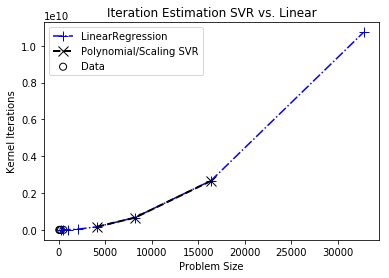

In [3]:
#markers: ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:#default o
#linestyle: '-', '--', '-.', ':', '', (offset, on-off-seq), ...}

lw, msize = 2, 10
plt.xlabel('Problem Size')
plt.ylabel('Kernel Iterations')
plt.title('Iteration Estimation SVR vs. Linear')

#our plots
plt.scatter(x,y,marker="o", label="Data",
          edgecolor='black', facecolor='none', s=50.0)
plt.plot(xt,y_pred,'blue', label="LinearRegression", marker="+", linestyle="-.", ms=msize)
plt.plot(xtest_large, y_poly, color='black', lw=lw, linestyle="--",label='Polynomial/Scaling SVR', marker="x", ms=msize)

plt.legend() #oldest last
plt.show()
